## Requirements

In [211]:
!pip install pytube
!pip install opencv-python

## Vedio loader

In [212]:
from pytube import YouTube
def download_videos(youtube_urls, output_path):
    for url in youtube_urls:
        try:
            yt = YouTube(url)
            video_stream = yt.streams.get_highest_resolution()
            if video_stream:
                video_stream.download(output_path)
                print(f"Video from {url} downloaded successfully.")
            else:
                print(f"No video streams available for {url}.")
        except Exception as e:
            print(f"Error downloading video from {url}: {e}")
youtube_urls = [
    "https://www.youtube.com/watch?v=3wVpVH0Wa6E",
    "https://www.youtube.com/watch?v=7L8Kt4LLKOE",
    "https://www.youtube.com/shorts/QCdS8v_A-rY",
]
output_path = "./downloaded_videos"
download_videos(youtube_urls, output_path)

Video from https://www.youtube.com/watch?v=3wVpVH0Wa6E downloaded successfully.
Video from https://www.youtube.com/watch?v=7L8Kt4LLKOE downloaded successfully.
Video from https://www.youtube.com/shorts/QCdS8v_A-rY downloaded successfully.


## Input/Output paths

In [ ]:
INPUT_VIDEOS_PATH = "/content/downloaded_videos"
OUTPUT_FRAMES_PATH = "/content/extracted_frames"

Frame sampling method:

frames_per_second: Extract frames at a specific frame rate (e.g., 10).
frames_per_video: Extract a fixed number of frames from each video (e.g., 100).
shot_transition: Extract frames based on changes in the video (experimental).
all_frames: Extract all frames from each video.

## Vedio to Frame Conversion

In [ ]:
sampling_method = "all_frames"
fps = 10  # "frames_per_second
num_frames = 100 #"frames_per_video"
shot_threshold = 0.2  #  "shot_transition" method (0 to 1)

In [ ]:
import cv2
import os

def extract_frames(video_path, output_path):
  cap = cv2.VideoCapture(video_path)

  frame_count = 0
  frame_captured = 0

  if sampling_method == "frames_per_second":
    frame_interval = 1 / fps

  while True:
    ret, frame = cap.read()

    if not ret:
      break

    if sampling_method == "frames_per_second":
      if frame_count % frame_interval == 0:
        save_frame(frame, output_path, frame_captured)
        frame_captured += 1

    elif sampling_method == "frames_per_video":
      if frame_captured < num_frames:
        save_frame(frame, output_path, frame_captured)
        frame_captured += 1

    elif sampling_method == "shot_transition":
      if current_frame and cv2.compareHist(current_frame, frame, cv2.HISTCMP_CORREL) < shot_threshold:
        save_frame(frame, output_path, frame_captured)
        frame_captured += 1

    elif sampling_method == "all_frames":
      save_frame(frame, output_path, frame_captured)
      frame_captured += 1

    current_frame = frame.copy()
    frame_count += 1

  cap.release()

def save_frame(frame, output_path, frame_number):
  image_path = os.path.join(output_path, f"frame_{frame_number}.jpg")
  cv2.imwrite(image_path, frame)

# Loop through each video file
for video_file in os.listdir(INPUT_VIDEOS_PATH):
  if video_file.endswith(".mp4") or video_file.endswith(".avi"):  # Adjust supported formats
    video_path = os.path.join(INPUT_VIDEOS_PATH, video_file)
    output_dir = os.path.join(OUTPUT_FRAMES_PATH, video_file[:-4])  # Create folder for each video
    os.makedirs(output_dir, exist_ok=True)
    extract_frames(video_path, output_dir)

## Applying augmentation on single frame

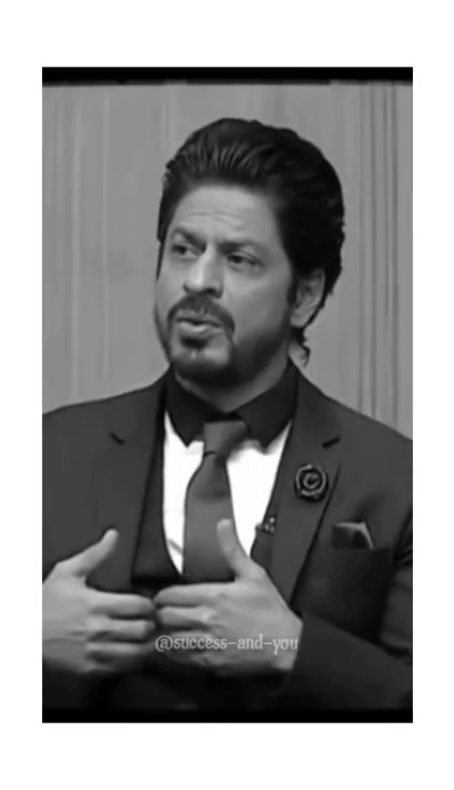

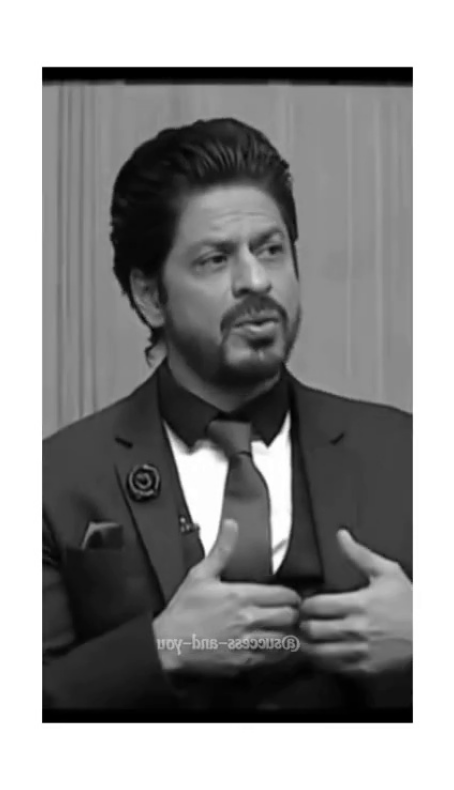

In [214]:
import random
import cv2
from matplotlib import pyplot as plt
import albumentations as A
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)
    image = cv2.imread('/content/extracted_frames/vedio_3/frame_746.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)
transform = A.HorizontalFlip(p=0.5)
random.seed(7)
augmented_image = transform(image=image)['image']
visualize(augmented_image)

## Applying Augmentation on Input Vedio

## Horizontal Flip

In [215]:
import cv2
import albumentations as A
import numpy as np
import requests
cap = cv2.VideoCapture('/content/downloaded_videos/vedio_3.mp4')
transform = A.Compose([A.HorizontalFlip(p=0.5)])
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('augmented_video.mp4', fourcc, 30.0, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    augmented_frame = transform(image=frame)['image']
    out.write(augmented_frame)
cap.release()
out.release()
url = 'https://example.com/augmented_video.mp4'
local_path = 'downloaded_augmented_video.mp4'
with open(local_path, 'wb') as f:
    response = requests.get(url, stream=True)
    f.write(response.content)

## Vertical Flip

In [217]:
import cv2
import albumentations as A
import numpy as np
import requests
cap = cv2.VideoCapture('/content/downloaded_videos/vedio_3.mp4')
transform = A.Compose([A.VerticalFlip(p=0.5)])
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('augmented_video.mp4', fourcc, 30.0, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    augmented_frame = transform(image=frame)['image']
    out.write(augmented_frame)
cap.release()
out.release()
url = 'https://example.com/augmented_video.mp4'
local_path = 'downloaded_augmented_video.mp4'
with open(local_path, 'wb') as f:
    response = requests.get(url, stream=True)
    f.write(response.content)

## Rotation

In [218]:
import cv2
import albumentations as A
import numpy as np
import requests
cap = cv2.VideoCapture('/content/downloaded_videos/vedio_3.mp4')
transform = A.Compose([A.ShiftScaleRotate(p=0.5)])
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('augmented_video.mp4', fourcc, 30.0, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    augmented_frame = transform(image=frame)['image']
    out.write(augmented_frame)
cap.release()
out.release()
url = 'https://example.com/augmented_video.mp4'
local_path = 'downloaded_augmented_video.mp4'
with open(local_path, 'wb') as f:
    response = requests.get(url, stream=True)
    f.write(response.content)

## Combination

In [219]:
import cv2
import albumentations as A
import numpy as np
import requests
cap = cv2.VideoCapture('/content/downloaded_videos/vedio_3.mp4')
transform = A.Compose([
    A.CLAHE(),
    A.RandomRotate90(),
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
    A.Blur(blur_limit=3),
    A.OpticalDistortion(),
    A.GridDistortion(),
    A.HueSaturationValue(),
])
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('augmented_video.mp4', fourcc, 30.0, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    augmented_frame = transform(image=frame)['image']
    out.write(augmented_frame)
cap.release()
out.release()
url = 'https://example.com/augmented_video.mp4'
local_path = 'downloaded_augmented_video.mp4'
with open(local_path, 'wb') as f:
    response = requests.get(url, stream=True)
    f.write(response.content)

## Flip, Blur, Rotate

In [223]:
import cv2
import albumentations as A
import numpy as np
import requests
cap = cv2.VideoCapture('/content/downloaded_videos/vedio_3.mp4')
transform = A.Compose([
    A.ToFloat(max_value=65535.0),

    A.RandomRotate90(),
    A.Flip(),
    A.OneOf([
        A.MotionBlur(p=0.2),
        A.MedianBlur(blur_limit=5, p=0.1),
        A.Blur(blur_limit=3, p=0.1),
    ], p=0.2),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
    A.OneOf([
        A.OpticalDistortion(p=0.3),
        A.GridDistortion(p=0.1),
    ], p=0.2),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=0.1, val_shift_limit=0.1, p=0.3),

    A.FromFloat(max_value=65535.0),
])
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('augmented_video.mp4', fourcc, 30.0, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    augmented_frame = transform(image=frame)['image']
    out.write(augmented_frame)
cap.release()
out.release()
url = 'https://example.com/augmented_video.mp4'
local_path = 'downloaded_augmented_video.mp4'
with open(local_path, 'wb') as f:
    response = requests.get(url, stream=True)
    f.write(response.content)

## Brightness & RGB Colour Shift

In [226]:
import cv2
import albumentations as A
import numpy as np
import requests
cap = cv2.VideoCapture('/content/downloaded_videos/vedio_3.mp4')
transform = A.Compose([
        A.RandomBrightnessContrast(p=0.3),
        A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
])
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('augmented_video.mp4', fourcc, 30.0, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    augmented_frame = transform(image=frame)['image']
    out.write(augmented_frame)
cap.release()
out.release()
url = 'https://example.com/augmented_video.mp4'
local_path = 'downloaded_augmented_video.mp4'
with open(local_path, 'wb') as f:
    response = requests.get(url, stream=True)
    f.write(response.content)

## Padding
(It has no impact on vedio alongwith it creates issue in vedio, may be employed on frames)

In [232]:
import cv2
import albumentations as A
import numpy as np
cap = cv2.VideoCapture('/content/downloaded_videos/vedio_3.mp4')
transform = A.Compose([
    A.PadIfNeeded(min_height=128, min_width=128, always_apply=True, p=1, value=0),
])
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('augmented_video.mp4', fourcc, 30.0, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    augmented_frame = transform(image=frame)['image']
    out.write(augmented_frame)
cap.release()
out.release()
url = 'https://example.com/padded_video.mp4'
local_path = 'downloaded_padded_video.mp4'
with open(local_path, 'wb') as f:
    response = requests.get(url, stream=True)
    f.write(response.content)

## Center Crop

In [237]:
import cv2
import albumentations as A
import numpy as np

# Load the video
cap = cv2.VideoCapture('/content/downloaded_videos/vedio_3.mp4')
transform = A.Compose([
    A.CenterCrop(height=128, width=128, always_apply=True, p=1),
])
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('augmented_video.mp4', fourcc, 30.0, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Apply the augmentation
    augmented_frame = transform(image=frame)['image']
    out.write(augmented_frame)
cap.release()
out.release()
url = 'https://example.com/Crop_video.mp4'
local_path = 'downloaded_Crop_video.mp4'
with open(local_path, 'wb') as f:
    response = requests.get(url, stream=True)
    f.write(response.content)

RandomRotate90 (Randomly rotates by 0, 90, 180, 270 degrees)

In [240]:
import cv2
import albumentations as A
import numpy as np

# Load the video
cap = cv2.VideoCapture('/content/downloaded_videos/vedio_3.mp4')

# Define the augmentation
transform = A.Compose([
    A.RandomRotate90(p=1),
])

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('augmented_video.mp4', fourcc, 30.0, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Apply the augmentation
    augmented_frame = transform(image=frame)['image']

    # Write the augmented frame to the output video
    out.write(augmented_frame)

# Release the VideoCapture and VideoWriter objects
cap.release()
out.release()
url = 'https://example.com/Crop_video.mp4'
local_path = 'downloaded_Crop_video.mp4'
with open(local_path, 'wb') as f:
    response = requests.get(url, stream=True)
    f.write(response.content)

Transpose (switch X and Y axis)

In [243]:
import cv2
import albumentations as A
import numpy as np

# Load the video
cap = cv2.VideoCapture('/content/downloaded_videos/vedio_3.mp4')

# Define the augmentation
transform = A.Compose([
    A.Transpose(p=1),
])

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('augmented_video.mp4', fourcc, 30.0, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Apply the augmentation
    augmented_frame = transform(image=frame)['image']

    # Write the augmented frame to the output video
    out.write(augmented_frame)

# Release the VideoCapture and VideoWriter objects
cap.release()
out.release()

Non-rigid transformations: ElasticTransform, GridDistortion, OpticalDistortion

In [245]:
import cv2
import albumentations as A
import numpy as np

# Load the video
cap = cv2.VideoCapture('/content/downloaded_videos/vedio_3.mp4')

# Define the augmentation
transform = A.Compose([
    A.ElasticTransform(p=1, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03)
    #A.GridDistortion(p=1)
    #A.OpticalDistortion(distort_limit=2, shift_limit=0.5, p=1)
])

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('augmented_video.mp4', fourcc, 30.0, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Apply the augmentation
    augmented_frame = transform(image=frame)['image']

    # Write the augmented frame to the output video
    out.write(augmented_frame)

# Release the VideoCapture and VideoWriter objects
cap.release()
out.release()

##Let's add non rigid transformations and RandomSizedCrop

In [246]:
import cv2
import albumentations as A
import numpy as np

# Load the video
cap = cv2.VideoCapture('/content/downloaded_videos/vedio_3.mp4')

# Define the augmentation
transform = A.Compose([
    A.OneOf([
        A.RandomSizedCrop(min_max_height=(50, 101), height=original_height, width=original_width, p=0.5),
        A.PadIfNeeded(min_height=original_height, min_width=original_width, p=0.5)
    ],p=1),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.OneOf([
        A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
        A.GridDistortion(p=0.5),
        A.OpticalDistortion(distort_limit=1, shift_limit=0.5, p=1),
    ], p=0.8)])


# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('augmented_video.mp4', fourcc, 30.0, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Apply the augmentation
    augmented_frame = transform(image=frame)['image']

    # Write the augmented frame to the output video
    out.write(augmented_frame)

# Release the VideoCapture and VideoWriter objects
cap.release()
out.release()

##Let's add non-spatial stransformations.
Many non-spatial transformations like CLAHE, RandomBrightness, RandomContrast, RandomGamma can be also added. They will be applied only to the image and not the mask.

In [255]:
import cv2
import albumentations as A
import numpy as np

# Load the video
cap = cv2.VideoCapture('/content/downloaded_videos/vedio_3.mp4')

# Define the augmentation
transform = A.Compose([
    A.OneOf([
        A.RandomSizedCrop(min_max_height=(50, 101), height=original_height, width=original_width, p=0.5),
        A.PadIfNeeded(min_height=cap.get(cv2.CAP_PROP_FRAME_HEIGHT), min_width=cap.get(cv2.CAP_PROP_FRAME_WIDTH), p=0.5)
    ], p=1),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(p=0.5),
    A.OneOf([
        A.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03, p=0.5),
        A.GridDistortion(p=0.5),
        A.OpticalDistortion(distort_limit=2, shift_limit=0.5, p=1)
    ], p=0.8),
    A.CLAHE(p=0.8),
    A.RandomBrightnessContrast(p=0.8),
    A.RandomGamma(p=0.8)
])

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('augmented_video.mp4', fourcc, 30.0, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Apply the augmentation
    augmented_frame = transform(image=frame)['image']

    # Write the augmented frame to the output video
    out.write(augmented_frame)

# Release the VideoCapture and VideoWriter objects
cap.release()
out.release()
url = 'https://example.com/Crop_video.mp4'
local_path = 'downloaded_Crop_video.mp4'
with open(local_path, 'wb') as f:
    response = requests.get(url, stream=True)
    f.write(response.content)

## Random Rain, Snow, Shadow, Fog

In [253]:
import cv2
import albumentations as A
import numpy as np

# Load the video
cap = cv2.VideoCapture('/content/downloaded_videos/vedio_3.mp4')

# Define the augmentation
transform = A.Compose(
  [A.RandomRain(brightness_coefficient=0.9, drop_width=1, blur_value=5, p=1)],
  #[A.RandomSnow(brightness_coeff=2.5, snow_point_lower=0.3, snow_point_upper=0.5, p=1)],
  #[A.RandomSunFlare(flare_roi=(0, 0, 1, 0.5), angle_lower=0.5, p=1)],
  #[A.RandomShadow(num_shadows_lower=1, num_shadows_upper=1, shadow_dimension=5, shadow_roi=(0, 0.5, 1, 1)],
  #[A.RandomFog(fog_coef_lower=0.7, fog_coef_upper=0.8, alpha_coef=0.1, p=1)],
)

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('augmented_video.mp4', fourcc, 30.0, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Apply the augmentation
    augmented_frame = transform(image=frame)['image']

    # Write the augmented frame to the output video
    out.write(augmented_frame)

# Release the VideoCapture and VideoWriter objects
cap.release()
out.release()
url = 'https://example.com/Crop_video.mp4'
local_path = 'downloaded_Crop_video.mp4'
with open(local_path, 'wb') as f:
    response = requests.get(url, stream=True)
    f.write(response.content)